# 1D discrepancy model

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2

Module `rain.one_dimension` is for random sampling on interval [0, 1] while filling the interval:

In [4]:
import rain.one_dimension as r1d

`unif_pieces` function defines a probability density function on interval [0, 1] made of union of smaller sub-intervals given their centers and a unique radius.  
Examples:

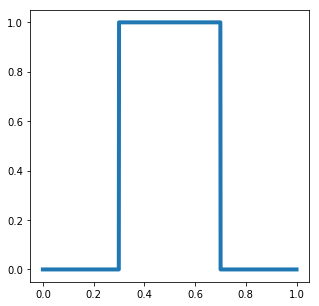

In [5]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.5], r=0.2), size=5)

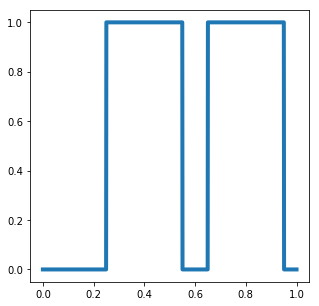

In [6]:
r1d.plot_density(lambda x: r1d.unif_pieces(x, centroids=[0.4, 0.8], r=0.15), size=5)

Similarly, `density_drops` defines the probability density for next drop sampling given previous drops (centroids) on interval [0, 1] and a `fill` parameters which id the fraction of interval [0, 1] where the density is zero.  
Note that in comparison to `unif_pieces`, the drops (centroids) correspond to regions where probability is zero.  
Examples:

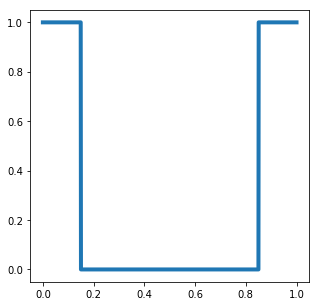

In [7]:
r1d.plot_density(lambda x: r1d.density_drops(x, centroids=[0.5], fill=0.7), size=5)

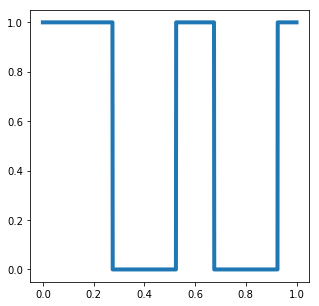

In [8]:
r1d.plot_density(lambda x: r1d.density_drops(x, centroids=[0.4, 0.8], fill=0.5), size=5)

--- 0
drop= 0.6511836992628416
--- 1
drop= 0.15557693757360092
--- 2
drop= 0.984747399858126
--- 3
drop= 0.3232662389249381
--- 4
drop= 0.7637050182327761
--- 5
drop= 0.874821727171949
--- 6
drop= 0.0009261934133820704
--- 7
drop= 0.23530636452218046
--- 8
drop= 0.39303797920459504
--- 9
drop= 0.5881668029138819


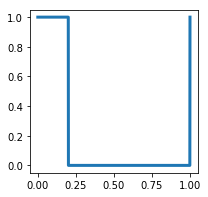

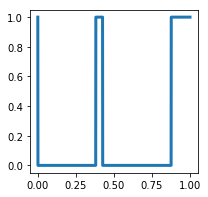

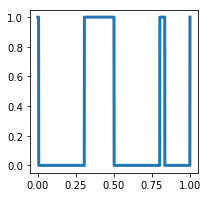

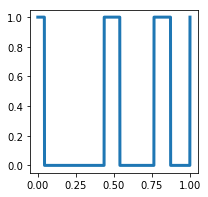

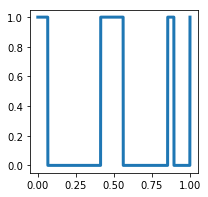

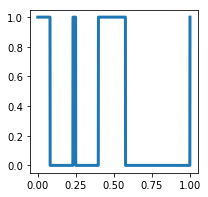

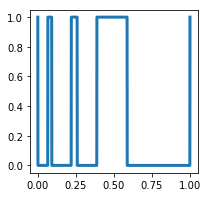

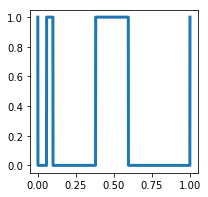

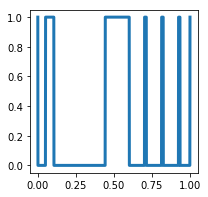

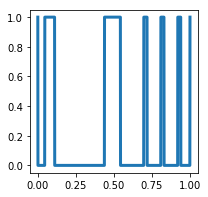

In [13]:
nb_drops = 10
drop = np.random.sample()
centers = []
for i in range(nb_drops):
    centers.append(drop)
    print ('---', i)
    print ("drop=", drop)
    #print("centers=", centers)
    density = lambda x: r1d.density_drops(x, centers, fill=0.9)
    r1d.plot_density(density, size=3, linewidth=3)
    drop = r1d.rejection_sampling(density)

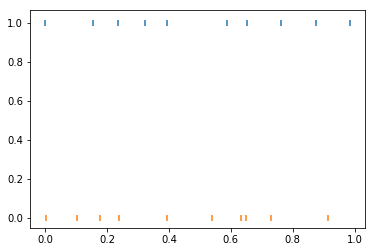

In [14]:
plt.scatter(centers, np.ones(nb_drops), marker='|')
plt.scatter(np.random.sample(nb_drops), np.zeros(len(centers)), marker='|');

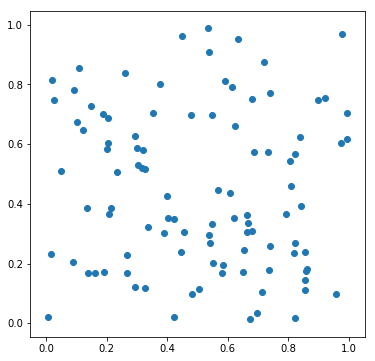

In [15]:
nb_drops = 100
plt.figure(figsize=(6,6))
plt.scatter(np.random.sample(nb_drops), np.random.sample(nb_drops), marker='o')

In [16]:
import matplotlib.animation as animation
from IPython.display import HTML

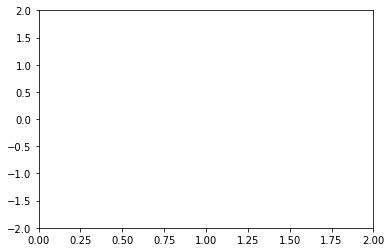

In [17]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [18]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [19]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [20]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [21]:
HTML(anim.to_html5_video())

In [15]:
print(matplotlib.animation.writers.list())

['imagemagick', 'imagemagick_file']
